In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
sns.set()

In [ ]:
dataset = pd.read_excel("/content/Data_Train.xlsx")
pd.set_option('display.max_columns', None)
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Multiple carriers,2022-03-09,Delhi,Cochin,DEL → BOM → COK,00:20,07:40,7h 20m,1 stop,In-flight meal not included,13977
1,Multiple carriers,2022-03-09,Delhi,Cochin,DEL → BOM → COK,00:20,12:55,12h 35m,1 stop,In-flight meal not included,18260
2,Jet Airways,2022-03-09,Delhi,Cochin,DEL → BOM → COK,00:20,04:25 10 Mar,28h 5m,1 stop,No info,15029
3,Jet Airways,2022-03-09,Delhi,Cochin,DEL → BOM → COK,00:20,04:25 10 Mar,28h 5m,1 stop,In-flight meal not included,11848
4,Multiple carriers,2022-03-01,Delhi,Cochin,DEL → BOM → COK,00:20,13:20,13h,1 stop,No info,29528


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [ ]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
dataset.dropna(inplace = True)

In [ ]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Multiple carriers,2022-03-09,Delhi,Cochin,DEL → BOM → COK,00:20,07:40,7h 20m,1 stop,In-flight meal not included,13977
1,Multiple carriers,2022-03-09,Delhi,Cochin,DEL → BOM → COK,00:20,12:55,12h 35m,1 stop,In-flight meal not included,18260
2,Jet Airways,2022-03-09,Delhi,Cochin,DEL → BOM → COK,00:20,04:25 10 Mar,28h 5m,1 stop,No info,15029
3,Jet Airways,2022-03-09,Delhi,Cochin,DEL → BOM → COK,00:20,04:25 10 Mar,28h 5m,1 stop,In-flight meal not included,11848
4,Multiple carriers,2022-03-01,Delhi,Cochin,DEL → BOM → COK,00:20,13:20,13h,1 stop,No info,29528


In [ ]:

dataset["journey_day"] = pd.to_datetime(dataset.Date_of_Journey, format="%d/%m/%Y").dt.day
dataset["journey_month"] = pd.to_datetime(dataset["Date_of_Journey"], format = "%d/%m/%Y").dt.month
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,Multiple carriers,2022-03-09,Delhi,Cochin,DEL → BOM → COK,00:20,07:40,7h 20m,1 stop,In-flight meal not included,13977,9,3
1,Multiple carriers,2022-03-09,Delhi,Cochin,DEL → BOM → COK,00:20,12:55,12h 35m,1 stop,In-flight meal not included,18260,9,3
2,Jet Airways,2022-03-09,Delhi,Cochin,DEL → BOM → COK,00:20,04:25 10 Mar,28h 5m,1 stop,No info,15029,9,3
3,Jet Airways,2022-03-09,Delhi,Cochin,DEL → BOM → COK,00:20,04:25 10 Mar,28h 5m,1 stop,In-flight meal not included,11848,9,3
4,Multiple carriers,2022-03-01,Delhi,Cochin,DEL → BOM → COK,00:20,13:20,13h,1 stop,No info,29528,1,3


In [ ]:
dataset.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [ ]:
dataset["dep_hour"] = pd.to_datetime(dataset["Dep_Time"]).dt.hour
dataset["dep_min"] = pd.to_datetime(dataset["Dep_Time"]).dt.minute
dataset.drop(["Dep_Time"], axis = 1, inplace = True)

In [ ]:
dataset["arrival_hour"] = pd.to_datetime(dataset["Arrival_Time"]).dt.hour
dataset["arrival_min"] = pd.to_datetime(dataset["Arrival_Time"]).dt.minute
dataset.drop(["Arrival_Time"], axis = 1, inplace = True)

In [ ]:
dataset.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 20m,1 stop,In-flight meal not included,13977,9,3,0,20,7,40
1,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,12h 35m,1 stop,In-flight meal not included,18260,9,3,0,20,12,55
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,28h 5m,1 stop,No info,15029,9,3,0,20,4,25
3,Jet Airways,Delhi,Cochin,DEL → BOM → COK,28h 5m,1 stop,In-flight meal not included,11848,9,3,0,20,4,25
4,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,29528,1,3,0,20,13,20


In [ ]:
duration = list(dataset["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))


dataset["Duration_hours"] = duration_hours
dataset["Duration_mins"] = duration_mins
dataset.drop(["Duration"], axis = 1, inplace = True)

dataset.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,13977,9,3,0,20,7,40,7,20
1,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,18260,9,3,0,20,12,55,12,35
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,15029,9,3,0,20,4,25,28,5
3,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,11848,9,3,0,20,4,25,28,5
4,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,29528,1,3,0,20,13,20,13,0


In [ ]:
dataset["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
Airline = dataset[["Airline"]]
Current_Airline_List = Airline['Airline']
New_Airline_List = []

for carrier in Current_Airline_List:
  if carrier in ['Jet Airways', 'IndiGo', 'Air India', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia']:
    New_Airline_List.append(carrier)
  else:
    New_Airline_List.append('Other')

Airline['Airline'] = pd.DataFrame(New_Airline_List)
Airline['Airline'].value_counts()

<ipython-input-17-202f95b680cf>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline'] = pd.DataFrame(New_Airline_List)


Jet Airways          3849
IndiGo               2053
Air India            1750
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Other                  23
Name: Airline, dtype: int64

In [ ]:
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara
0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0


In [ ]:
Source = dataset[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [ ]:
dataset["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
Destination = dataset[["Destination"]]
Current_Destination_List = Destination['Destination']
New_Destination_List = []

for value in Current_Destination_List:
  if value in ['New Delhi']:
    New_Destination_List.append('Delhi')
  else:
    New_Destination_List.append(value)

Destination['Destination'] = pd.DataFrame(New_Destination_List)

Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

<ipython-input-21-de443663747d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Destination['Destination'] = pd.DataFrame(New_Destination_List)


,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [ ]:
dataset.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [ ]:
dataset["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
dataset.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
dataset.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,Multiple carriers,Delhi,Cochin,1,13977,9,3,0,20,7,40,7,20
1,Multiple carriers,Delhi,Cochin,1,18260,9,3,0,20,12,55,12,35
2,Jet Airways,Delhi,Cochin,1,15029,9,3,0,20,4,25,28,5
3,Jet Airways,Delhi,Cochin,1,11848,9,3,0,20,4,25,28,5
4,Multiple carriers,Delhi,Cochin,1,29528,1,3,0,20,13,20,13,0


In [ ]:
data_train = pd.concat([dataset, Airline, Source, Destination], axis = 1) # axis = 1 signifies column
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

data_train.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,1,13977,9,3,0,20,7,40,7,20,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
1,1,18260,9,3,0,20,12,55,12,35,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
2,1,15029,9,3,0,20,4,25,28,5,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,1,11848,9,3,0,20,4,25,28,5,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,1,29528,1,3,0,20,13,20,13,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


In [ ]:
data_train.shape


(10682, 26)

In [ ]:
data_train.columns


Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata'],
      dtype='object')

In [ ]:
X = data_train.loc[:, ['Total_Stops', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]
y = data_train.iloc[:, 1]

In [ ]:
print(X.shape, y.shape)

(10682, 25) (10682,)


Feature_importance

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

print(selection.feature_importances_)

[0.25224016 0.14030094 0.07151112 0.03275511 0.03079632 0.03580835
 0.02633796 0.18152141 0.02118892 0.00829609 0.00238295 0.00713526
 0.04330903 0.00947938 0.03109408 0.00426962 0.00598311 0.00156381
 0.03718217 0.0171753  0.00632264 0.01121619 0.01305045 0.0072527
 0.00182694]


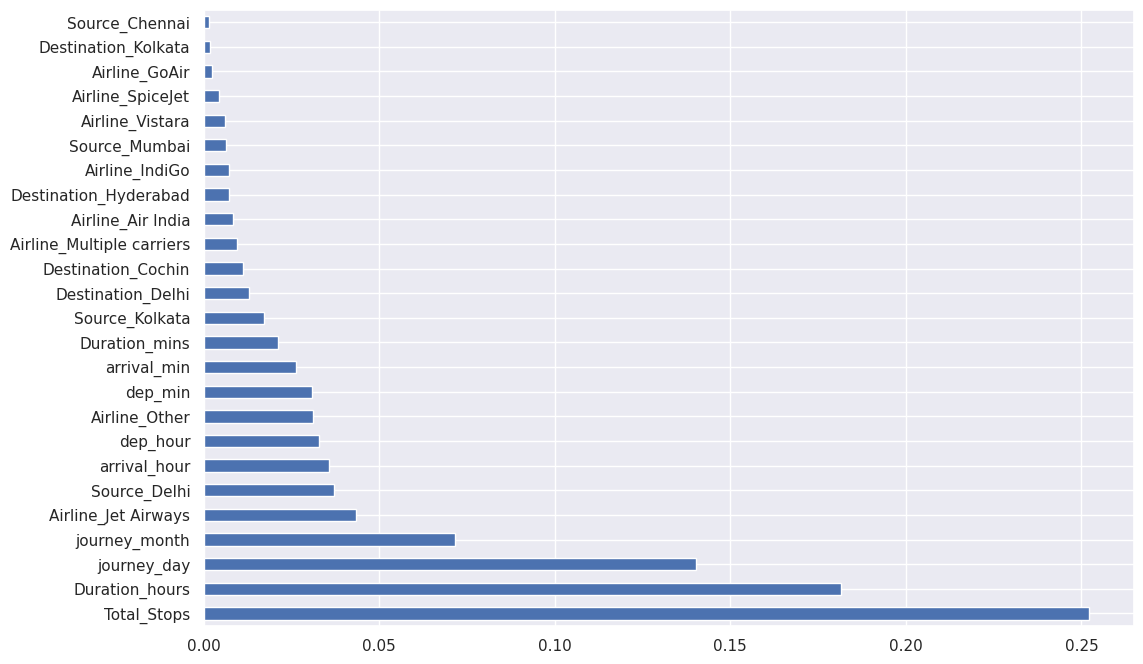

In [ ]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
    vif = pd.DataFrame()
    vif["variables"] = z.columns
    vif["VIF"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
    return(vif)

In [ ]:
calc_vif(X)


,variables,VIF
0,Total_Stops,7.435344
1,journey_day,3.500377
2,journey_month,15.633325
3,dep_hour,5.688195
4,dep_min,2.812593
5,arrival_hour,4.847043
6,arrival_min,3.409042
7,Duration_hours,5.835551
8,Duration_mins,3.988663
9,Airline_Air India,4.577963


In [ ]:
X = data_train.loc[:, ['Total_Stops', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]
X.head()

,Total_Stops,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,1,9,3,0,20,7,40,7,20,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1,9,3,0,20,12,55,12,35,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1,9,3,0,20,4,25,28,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,1,9,3,0,20,4,25,28,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,1,1,3,0,20,13,20,13,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


Fit model (checking different algorithms)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Linear algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
train_pred = lr_reg.predict(X_train)
test_pred = lr_reg.predict(X_test)

# Calculate R-squared (R2) score
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

# Print the R2 scores

print('Training Set R-squared (R2) Score:', train_r2*100)
print('Test Set R-squared (R2) Score:', test_r2*100)

Training Set R-squared (R2) Score: 48.32231699981894
Test Set R-squared (R2) Score: 51.585545679218356


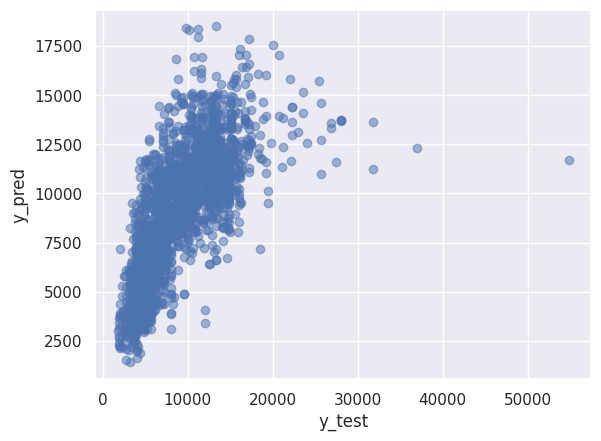

In [ ]:
y_pred = lr_reg.predict(X_test)
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
print('MAE for linear_algo:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE for linear_algo:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE for linear_algo:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE for linear_algo: 2203.049501236248
MSE for linear_algo: 9841198.890051857
RMSE for linear_algo: 3137.0685185459142


In [ ]:
print('Normalized RMSE ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)),2))
print('Max Value: ', max(y), '\nMin Value: ', min(y))

Normalized RMSE  0.06
Max Value:  79512 
Min Value:  1759


Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Polynomial Regression (Example for degree=2)
poly_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have already fitted the 'poly_reg' model
train_pred = poly_reg.predict(X_train)
test_pred = poly_reg.predict(X_test)

# Calculate R-squared (R2) score
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

# Print the R2 scores

print('Training Set R-squared (R2) Score:', train_r2*100)
print('Test Set R-squared (R2) Score:', test_r2*100)


Training Set R-squared (R2) Score: 65.66471568096335
Test Set R-squared (R2) Score: 64.89691213758671


Ridge regression

In [ ]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)




Ridge()

In [ ]:

train_pred = ridge_reg.predict(X_train)
test_pred = ridge_reg.predict(X_test)

# Calculate R-squared (R2) score
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

# Print the R2 scores

print('Training Set R-squared (R2) Score:', train_r2*100)
print('Test Set R-squared (R2) Score:', test_r2*100)

Training Set R-squared (R2) Score: 48.31960457763218
Test Set R-squared (R2) Score: 51.644566904701975


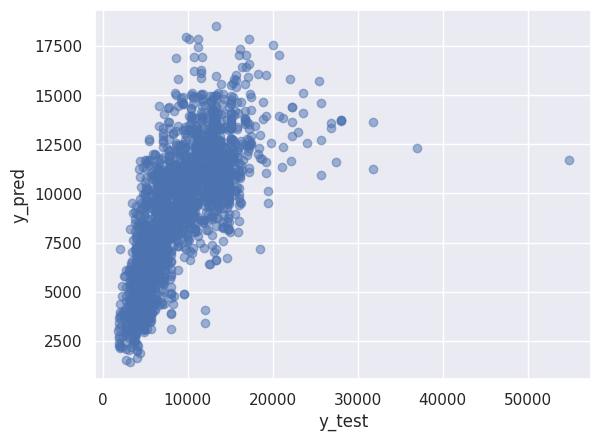

In [ ]:
y_pred = ridge_reg.predict(X_test)
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
print('MAE for log_algo:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE for log_algo:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE for log_algo:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE for log_algo: 2202.5642841410845
MSE for log_algo: 9829201.654373636
RMSE for log_algo: 3135.1557623782646


In [ ]:
print('Normalized RMSE ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)),2))
print('Max Value: ', max(y), '\nMin Value: ', min(y))

Normalized RMSE  0.06
Max Value:  79512 
Min Value:  1759


Lasso regression model

In [ ]:
from sklearn.linear_model import Lasso

# Lasso Regression
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)


Lasso()

In [ ]:
train_pred = lasso_reg.predict(X_train)
test_pred = lasso_reg.predict(X_test)

# Calculate R-squared (R2) score
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

# Print the R2 scores

print('Training Set R-squared (R2) Score:', train_r2*100)
print('Test Set R-squared (R2) Score:', test_r2*100)

Training Set R-squared (R2) Score: 48.31770117557909
Test Set R-squared (R2) Score: 51.63146436794723


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2202.5642841410845
MSE: 9829201.654373636
RMSE: 3135.1557623782646


In [ ]:
print('Normalized RMSE ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)),2))
print('Max Value: ', max(y), '\nMin Value: ', min(y))

Normalized RMSE  0.06
Max Value:  79512 
Min Value:  1759


Elastic algorithm

In [ ]:
from sklearn.linear_model import ElasticNet

# Elastic Net
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)


ElasticNet()

In [ ]:
train_pred = elastic_net.predict(X_train)
test_pred = elastic_net.predict(X_test)

# Calculate R-squared (R2) score
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

# Print the R2 scores

print('Training Set R-squared (R2) Score:', train_r2*100)
print('Test Set R-squared (R2) Score:', test_r2*100)

Training Set R-squared (R2) Score: 38.09743481692816
Test Set R-squared (R2) Score: 42.35963031502272


In [ ]:
from sklearn import metrics
y_pred = elastic_net.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2505.5393002683923
MSE: 11716549.326519785
RMSE: 3422.9445403803707


In [ ]:
from sklearn import metrics
y_pred = elastic_net.predict(X_test)
print('Normalized RMSE ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)),2))
print('Max Value: ', max(y), '\nMin Value: ', min(y))

Normalized RMSE  0.06
Max Value:  79512 
Min Value:  1759


DecisionTreeregresssion

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regression
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)


DecisionTreeRegressor()

In [ ]:
print('Model Performance on Training Set:', round(tree_reg.score(X_train, y_train)*100,2))
print('Model Performance on Test Set:', round(tree_reg.score(X_test, y_test)*100,2))

Model Performance on Training Set: 97.9
Model Performance on Test Set: 64.86


GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regression
gradient_boost_reg = GradientBoostingRegressor()
gradient_boost_reg.fit(X_train, y_train)


GradientBoostingRegressor()

In [ ]:
train_pred = gradient_boost_reg.predict(X_train)
test_pred = gradient_boost_reg.predict(X_test)

# Calculate R-squared (R2) score
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

# Print the R2 scores

print('Training Set R-squared (R2) Score:', train_r2*100)
print('Test Set R-squared (R2) Score:', test_r2*100)

Training Set R-squared (R2) Score: 72.63939794344046
Test Set R-squared (R2) Score: 72.89783413143633


Support vector Regression

In [ ]:
from sklearn.svm import SVR

# Support Vector Regression (SVR)
svr_reg = SVR(kernel='linear')
svr_reg.fit(X_train, y_train)


SVR(kernel='linear')

In [ ]:
train_pred = svr_reg.predict(X_train)
test_pred = svr_reg.predict(X_test)

# Calculate R-squared (R2) score
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

# Print the R2 scores

print('Training Set R-squared (R2) Score:', train_r2*100)
print('Test Set R-squared (R2) Score:', test_r2*100)

Training Set R-squared (R2) Score: 33.63528549524097
Test Set R-squared (R2) Score: 38.17292636966025


KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# K-Nearest Neighbors (KNN) Regression
knn_reg = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn_reg.fit(X_train, y_train)


KNeighborsRegressor()

In [ ]:
train_pred = knn_reg.predict(X_train)
test_pred = knn_reg.predict(X_test)

# Calculate R-squared (R2) score
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

# Print the R2 scores

print('Training Set R-squared (R2) Score:', train_r2*100)
print('Test Set R-squared (R2) Score:', test_r2*100)

Training Set R-squared (R2) Score: 73.10086290017107
Test Set R-squared (R2) Score: 58.62295228613819


Gaussain regression



In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
# Gaussian Process Regression
gp_reg = GaussianProcessRegressor()
gp_reg.fit(X_train, y_train)


GaussianProcessRegressor()

In [ ]:
train_pred = gp_reg.predict(X_train)
test_pred = gp_reg.predict(X_test)

# Calculate R-squared (R2) score
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

# Print the R2 scores

print('Training Set R-squared (R2) Score:', train_r2*100)
print('Test Set R-squared (R2) Score:', test_r2*100)

Training Set R-squared (R2) Score: 97.89832518409688
Test Set R-squared (R2) Score: -206.1998826388273


Random Forest algorithm

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
train_pred = rf_reg.predict(X_train)
test_pred = rf_reg.predict(X_test)

# Calculate R-squared (R2) score
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

# Print the R2 scores

print('Training Set R-squared (R2) Score:', train_r2*100)
print('Test Set R-squared (R2) Score:', test_r2*100)

Training Set R-squared (R2) Score: 95.41559618520273
Test Set R-squared (R2) Score: 79.17282153484582


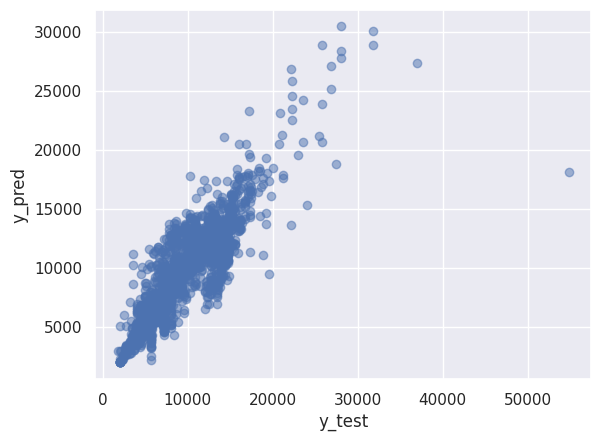

In [ ]:
y_pred = rf_reg.predict(X_test)
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1286.1829514732005
MSE: 4233537.452186203
RMSE: 2057.556184454316


In [ ]:
print('Normalized RMSE ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)),2))
print('Max Value: ', max(y), '\nMin Value: ', min(y))

Normalized RMSE  0.04
Max Value:  79512 
Min Value:  1759


In [ ]:
import pickle
file = open('c1_flight_gbr.pkl', 'wb')
pickle.dump(gradient_boost_reg,file)